#Task 4: Data Visualization with Matplotlib


###a)Write a function plot_age_distribution(df) that:
####Plots the distribution of ages using a histogram.
###b)Save the plot as age_distribution.png.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [3]:
def plot_age_distribution(df):
    plt.figure(figsize=(10, 6))
    plt.hist(df['Age'], bins=20, edgecolor='black')
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.savefig('age_distribution.png') #b saving the plot
    plt.show()


###c)Write a function plot_average_age_by_class(df) that:
####Plots the average age by travel class using a bar chart.
###d) Save the plot plot as average_age_by_class.png.




In [4]:
def plot_average_age_by_class(df):
    # calculate average age by travel class
    avg_ages = df.groupby('TravelClass')['Age'].mean()

    # plot
    plt.figure(figsize=(10, 6))
    avg_ages.plot(kind='bar', edgecolor='black')
    plt.title('Average Age by Travel Class')
    plt.xlabel('Travel Class')
    plt.ylabel('Average Age')
    plt.savefig('average_age_by_class.png')#d saving the plot
    plt.show()

#Task 5: Data Visualization with Seaborn and Plotly

In [5]:
import seaborn as sns
import plotly.express as px

###a) Function plot age vs loyalty(df). plots a scatter plot using Seaborn.
####b) saving plot

In [6]:
def plot_age_vs_loyalty(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Age', y='LoyaltyMember', data=df)
    plt.title('Age vs. Loyalty Membership')
    plt.xlabel('Age')
    plt.ylabel('Loyalty Membership')
    plt.savefig('age_vs_loyalty.png') #b save plot
    plt.show()

###c) Function plot age distribution by class(df) using boxplot.
####d) saving plot

In [23]:
def plot_age_distribution_by_class(df):
    current_year = datetime.now().year
    if 'Birthdate' in df.columns and 'TravelClass' in df.columns:
        df['Age'] = current_year - df['Birthdate'].dt.year
        fig = px.box(df, x="TravelClass", y="Age", title="Age Distribution by Travel Class")
        fig.update_traces(quartilemethod="exclusive")
        fig.update_layout(xaxis_title="Travel Class", yaxis_title="Age")
        fig.write_image("age_distribution_by_class.png")
        fig.show()

#Bonus:
###There is an employee_analysis mentioned but this is passenger_analysis.
### Let's import everything in.

In [9]:
 pip install -U kaleido

In [10]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.io as pio
import plotly.express as px

import passenger_analysis

In [14]:
#Let's load our CSV file
df = passenger_analysis.load_data('/content/passengers.csv')

print(df)

     300          Unnamed: 1  Unnamed: 2   Unnamed: 3  Unnamed: 4 Unnamed: 5
0      1            John Doe   5/21/1987  FIRST_CLASS        True      BA249
1      2          Jane Smith  11/12/1980     BUSINESS       False      AA100
2      3            Mia Wong    3/8/1992      ECONOMY        True      BA255
3      4        Noah Johnson   7/19/1995      ECONOMY       False      AA110
4      5      Isabella Rossi   8/30/1982  FIRST_CLASS        True      BA249
..   ...                 ...         ...          ...         ...        ...
295  296        Emily Miller    9/7/1991  FIRST_CLASS       False      BA835
296  297      Brandon Wilson  12/30/1974      ECONOMY        True      AA705
297  298  Stephanie Martinez   2/23/1987     BUSINESS       False      BA840
298  299     David Hernandez   5/18/1995  FIRST_CLASS        True      AA710
299  300       Jessica Clark   8/11/1978      ECONOMY       False      BA845

[300 rows x 6 columns]


###Headers are unnamed let's change that.

---



In [15]:
df.columns = df.columns.str.replace('Unnamed: 1', 'Name')
df.columns = df.columns.str.replace('Unnamed: 2', 'Birthdate')
df.columns = df.columns.str.replace('Unnamed: 3', 'TravelClass')
df.columns = df.columns.str.replace('Unnamed: 4', 'LoyaltyMember')
df.columns = df.columns.str.replace('Unnamed: 5', 'FlightNumber')

##Here we will use a function that will determine 'Age' by using the 'Birthdate' and have a new column of 'Age'

In [16]:
# Assume df is your DataFrame and 'Birthdate' is the column with dates

# Convert the 'Birthdate' column to datetime format
df['Birthdate'] = pd.to_datetime(df['Birthdate'], errors='coerce')

# Calculate age from Birthdate
def calculate_age(birthdate):
    today = datetime.today()
    age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
    return age

# Create a new column in the DataFrame to store the ages
df['Age'] = df['Birthdate'].apply(calculate_age)

###This is to create our new dataset with headers and ages.

In [17]:
# Save the updated DataFrame back to a CSV file
df = df.to_csv('passengers_ha.csv', index=False)
print(df)

None


###As we can see there is nothing after we tried see our dataset let's reload with the other CSV file with headers and ages.

In [19]:
df = passenger_analysis.load_data('/content/passengers_ha.csv')
print(df)

     300                Name   Birthdate  TravelClass  LoyaltyMember  \
0      1            John Doe  1987-05-21  FIRST_CLASS           True   
1      2          Jane Smith  1980-11-12     BUSINESS          False   
2      3            Mia Wong  1992-03-08      ECONOMY           True   
3      4        Noah Johnson  1995-07-19      ECONOMY          False   
4      5      Isabella Rossi  1982-08-30  FIRST_CLASS           True   
..   ...                 ...         ...          ...            ...   
295  296        Emily Miller  1991-09-07  FIRST_CLASS          False   
296  297      Brandon Wilson  1974-12-30      ECONOMY           True   
297  298  Stephanie Martinez  1987-02-23     BUSINESS          False   
298  299     David Hernandez  1995-05-18  FIRST_CLASS           True   
299  300       Jessica Clark  1978-08-11      ECONOMY          False   

    FlightNumber  Age  
0          BA249   37  
1          AA100   43  
2          BA255   32  
3          AA110   28  
4          BA24

In [20]:
print(df.dtypes)

300               int64
Name             object
Birthdate        object
TravelClass      object
LoyaltyMember      bool
FlightNumber     object
Age               int64
dtype: object


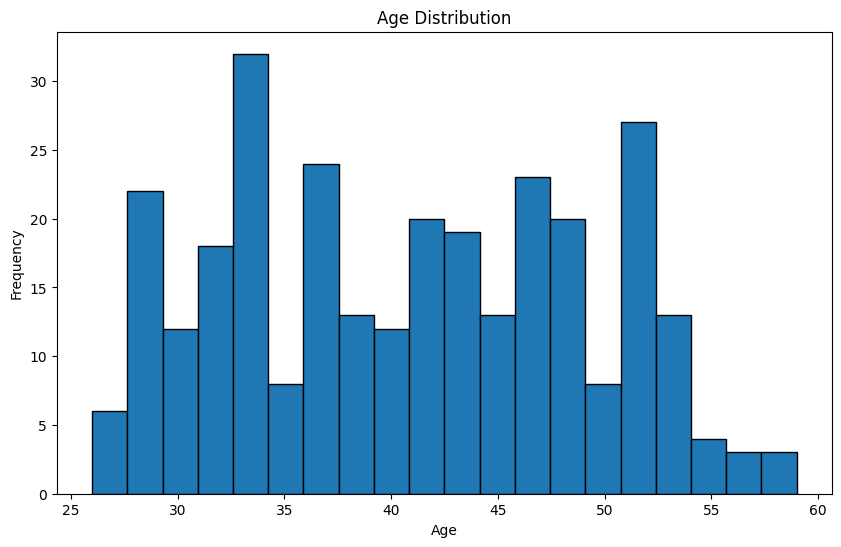

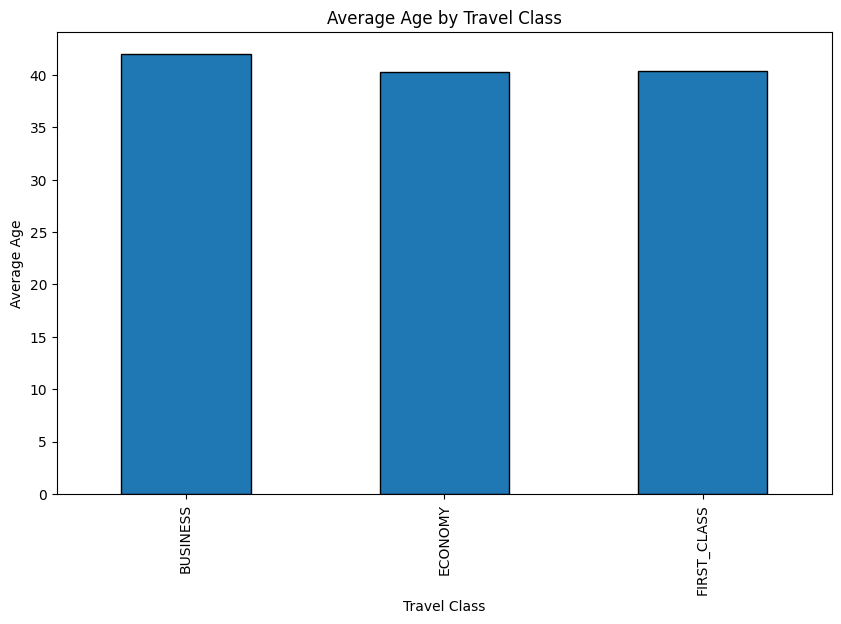

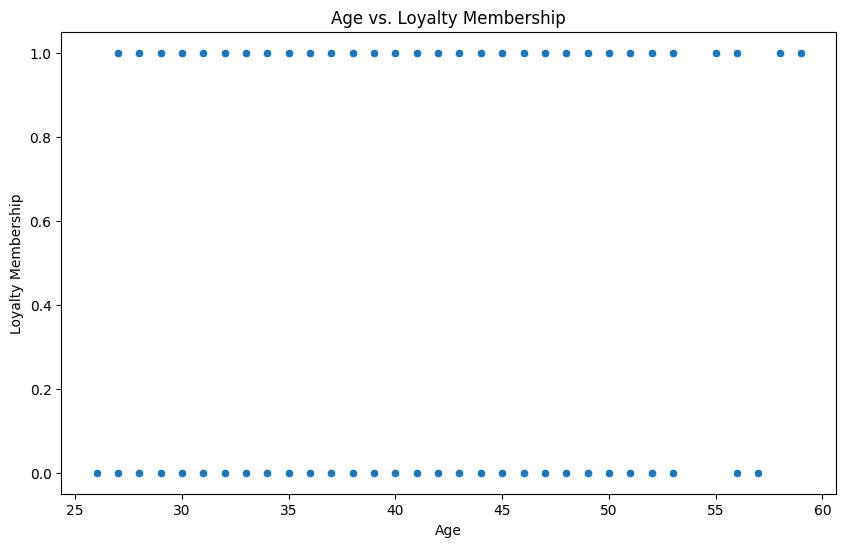

{'FIRST_CLASS': {'Average Age': 40.87, 'Loyalty Members': 53}, 'BUSINESS': {'Average Age': 42.57142857142857, 'Loyalty Members': 47}, 'ECONOMY': {'Average Age': 40.86274509803921, 'Loyalty Members': 54}}


In [26]:
import passenger_analysis

def main():
    df = passenger_analysis.load_data('passengers_ha.csv')
    df = passenger_analysis.clean_data(df)

    # Plot age distribution
    plot_age_distribution(df)

    # Plot average age by class
    plot_average_age_by_class(df)

    # Plot age vs. loyalty
    plot_age_vs_loyalty(df)

    # Plot age distribution by class
    plot_age_distribution_by_class(df)

    # Class Stats
    print(passenger_analysis.get_class_statistics(df))

if __name__ == "__main__":
    main()


##This is the result of get_class_statistics
###{'FIRST_CLASS': {'Average Age': 40.87, 'Loyalty Members': 53}, 'BUSINESS': {'Average Age': 42.57142857142857, 'Loyalty Members': 47}, 'ECONOMY': {'Average Age': 40.86274509803921, 'Loyalty Members': 54}}